In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [58]:
# Load the datasets
feedback_df = pd.read_csv("C:\\Users\\ShrinilamangaiR\\Downloads\\feedback_mart.csv")
training_df = pd.read_csv("C:\\Users\\ShrinilamangaiR\\Downloads\\training_mart.csv")
users_df = pd.read_csv("C:\\Users\\ShrinilamangaiR\\Downloads\\users_mart.csv")

In [59]:
users_df

,ROLE,COUNT
0,Intern,86
1,Employee,189
2,Admin,52


In [60]:
training_df

,ROLE,TRAININGNAME,TOTAL_TRAINING_SESSIONS,AVG_TRAINING_DURATION_HOURS,MAX_TRAINING_DURATION_HOURS,MIN_TRAINING_DURATION_HOURS,MAX_COMPLETED_MODULES
0,Employee,OS,6,7.53,8.28,6.92,811
1,Intern,HTML&CSS,32,7.61,8.90,6.48,834
2,Intern,SQL,39,7.57,8.77,6.53,855
3,Intern,UI Path,42,7.40,8.83,6.18,761
4,Employee,Cloud Platforms,13,7.27,8.10,6.37,835
5,Employee,Analytics & Reporting,16,7.63,8.75,6.90,772
6,Intern,Typescript,23,7.34,8.37,6.03,809
7,Intern,DBT,35,7.38,8.82,6.18,857
8,Intern,Analytics & Reporting,29,7.65,8.77,6.52,845
9,Intern,Git & Version Control,42,7.32,8.87,6.35,846


In [61]:
feedback_df 

,TRAININGNAME,TRAINERNAME,EXCELLENT,VERY_GOOD,GOOD,FAIR,POOR,PERFORMANCE_PERCENTAGE
0,ADF,Rosamund Lynnitt,8,10,9,0,15,58.09524
1,Analytics & Reporting,Kalli Fearneley,8,8,8,0,9,63.63636
2,Cloud Platforms,Lenore Boulding,13,13,15,0,13,64.81482
3,DBT,Berni Gorghetto,12,7,8,0,4,74.83870
4,Data Warehouse,Sherill Sussems,14,9,6,0,13,65.23810
5,Git & Version Control,Jacky Muscat,10,6,3,0,11,62.66666
6,HTML&CSS,Shellie Tillyer,10,9,11,0,7,68.10810
7,Javascript,Ardis Shalders,5,9,14,0,14,55.71428
8,Networking,Gabi Wasiel,12,4,13,0,7,67.77778
9,OS,Beverlee Lachaize,11,12,13,0,9,67.11112


In [62]:
# Encode categorical variables
encoder = LabelEncoder()
merged_df['ROLE'] = encoder.fit_transform(merged_df['ROLE'])
merged_df

,ROLE,TRAININGNAME,TOTAL_TRAINING_SESSIONS,AVG_TRAINING_DURATION_HOURS,MAX_TRAINING_DURATION_HOURS,MIN_TRAINING_DURATION_HOURS,MAX_COMPLETED_MODULES,COUNT
0,0,OS,6,7.53,8.28,6.92,811,189
1,1,HTML&CSS,32,7.61,8.90,6.48,834,86
2,1,SQL,39,7.57,8.77,6.53,855,86
3,1,UI Path,42,7.40,8.83,6.18,761,86
4,0,Cloud Platforms,13,7.27,8.10,6.37,835,189
5,0,Analytics & Reporting,16,7.63,8.75,6.90,772,189
6,1,Typescript,23,7.34,8.37,6.03,809,86
7,1,DBT,35,7.38,8.82,6.18,857,86
8,1,Analytics & Reporting,29,7.65,8.77,6.52,845,86
9,1,Git & Version Control,42,7.32,8.87,6.35,846,86


In [63]:
# Feature selection
X = merged_df[['ROLE', 'TOTAL_TRAINING_SESSIONS', 'MAX_COMPLETED_MODULES']]
y = merged_df['AVG_TRAINING_DURATION_HOURS']

In [64]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
# Initialize and train the model
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [66]:
# Make predictions
predictions = model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.0965981603188693


In [67]:
# Group data separately for Employee and Intern
predictions_dict = {}
for role, group in merged_df.groupby('ROLE'):
    role_name = encoder.inverse_transform([role])[0]
    role_predictions = {}
    for training_name, training_group in group.groupby('TRAININGNAME'):
        X_group = training_group[['ROLE', 'TOTAL_TRAINING_SESSIONS', 'MAX_COMPLETED_MODULES']]
        predictions = model.predict(X_group)
        role_predictions[training_name] = predictions
    predictions_dict[role_name] = role_predictions

In [68]:
# Create an empty list to store DataFrames
dfs = []

# Group data separately for Employee and Intern
for encoded_role in range(2):  # Assuming there are only 2 roles
    role_name = 'Employee' if encoded_role == 0 else 'Intern'
    role_df = merged_df[merged_df['ROLE'] == encoded_role]
    for training_name, training_group in role_df.groupby('TRAININGNAME'):
        X_group = training_group[['ROLE', 'TOTAL_TRAINING_SESSIONS', 'MAX_COMPLETED_MODULES']]
        predictions = model.predict(X_group)
        # Create a DataFrame for the predictions with actual role name
        predictions_df = pd.DataFrame({'Role': [role_name]*len(predictions), 'TrainingName': [training_name]*len(predictions), 'PredictedTime': predictions})
        dfs.append(predictions_df)

# Concatenate DataFrames in the list to create the final DataFrame
predictions_df = pd.concat(dfs, ignore_index=True)

# Print predictions as a table
print(predictions_df)



        Role           TrainingName  PredictedTime
0   Employee                    ADF       7.261840
1   Employee  Analytics & Reporting       7.627984
2   Employee        Cloud Platforms       7.408656
3   Employee                    DBT       7.520663
4   Employee         Data Warehouse       7.352004
5   Employee  Git & Version Control       7.110101
6   Employee               HTML&CSS       7.783229
7   Employee             Javascript       7.032368
8   Employee             Networking       7.789858
9   Employee                     OS       7.529595
10  Employee               Power BI       7.467779
11  Employee                 Python       7.529974
12  Employee                     QA       7.528708
13  Employee               React JS       7.406847
14  Employee                    SQL       7.829288
15  Employee    Software Components       7.573962
16  Employee             Typescript       7.329692
17  Employee                UI Path       7.400252
18  Employee           UI/UX(Fi

In [69]:
import matplotlib.pyplot as plt

In [70]:
# Group predictions by training name and role
grouped_predictions = predictions_df.groupby(['TrainingName', 'Role']).mean().reset_index()

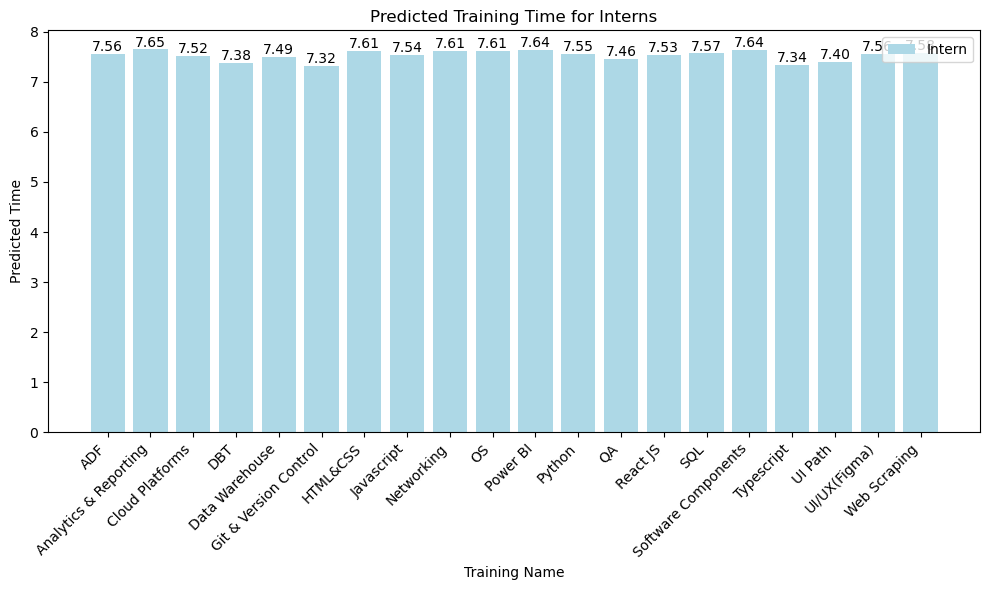

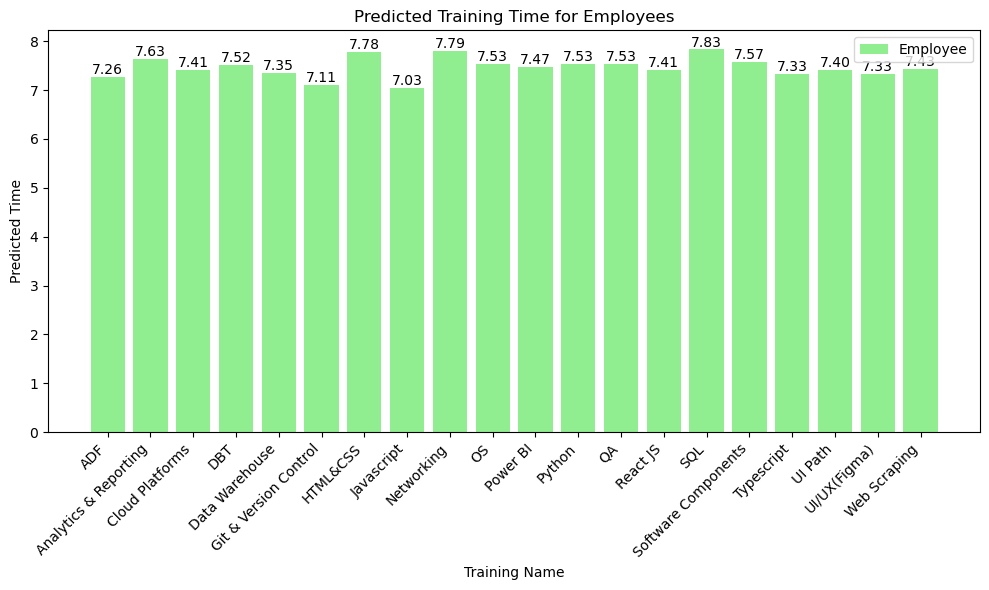

In [83]:
import matplotlib.pyplot as plt

# Function to add text annotations
def add_bar_values(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Plot predictions for Intern
plt.figure(figsize=(10, 6))
intern_bars = plt.bar(intern_predictions['TrainingName'], intern_predictions['PredictedTime'], color='lightblue', label='Intern')
plt.xlabel('Training Name')
plt.ylabel('Predicted Time')
plt.title('Predicted Training Time for Interns')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()

# Add text annotations for Intern bars
add_bar_values(plt.gca())

plt.show()

# Plot predictions for Employee
plt.figure(figsize=(10, 6))
employee_bars = plt.bar(employee_predictions['TrainingName'], employee_predictions['PredictedTime'], color='lightgreen', label='Employee')
plt.xlabel('Training Name')
plt.ylabel('Predicted Time')
plt.title('Predicted Training Time for Employees')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()

# Add text annotations for Employee bars
add_bar_values(plt.gca())

plt.show()


In [97]:
# Merge datasets
merged_data = pd.merge(feedback_df, training_df, on='TRAININGNAME', how='inner')

In [98]:
# Convert non-numeric columns to numeric
numeric_columns = ['EXCELLENT', 'VERY_GOOD', 'GOOD', 'FAIR', 'POOR']
merged_data[numeric_columns] = merged_data[numeric_columns].apply(pd.to_numeric, errors='coerce')

In [99]:
# Handle missing values if any
merged_data.fillna(0, inplace=True)  # Replace missing values with 0, you may choose a different strategy if needed

In [100]:
# Feature Engineering
# Calculate average feedback scores for each trainer
avg_feedback_scores = merged_data.groupby('TRAINERNAME')[numeric_columns].mean()

In [101]:
# Include additional features
merged_data['TOTAL_TRAINING_SESSIONS'] = merged_data.groupby('TRAINERNAME')['TRAININGNAME'].transform('count')

In [102]:
# Prepare data for training
X = merged_data[['TOTAL_TRAINING_SESSIONS', 'AVG_TRAINING_DURATION_HOURS', 'MAX_TRAINING_DURATION_HOURS', 'MIN_TRAINING_DURATION_HOURS']]
y = merged_data['PERFORMANCE_PERCENTAGE']

In [103]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [104]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [105]:
# Make predictions
y_pred = model.predict(X_test)
y_pred

array([62.50520049, 68.11585891, 62.7649724 , 64.54904451, 63.17532029,
       64.44598885, 64.69506729, 62.39176293])

In [109]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 11.288285177178443


In [108]:
# Extract model coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
coefficients

,Feature,Coefficient
0,TOTAL_TRAINING_SESSIONS,0.000000
1,AVG_TRAINING_DURATION_HOURS,3.845047
2,MAX_TRAINING_DURATION_HOURS,-0.782585
3,MIN_TRAINING_DURATION_HOURS,5.358364


In [113]:
# Rank trainers based on predicted performance percentage
trainer_performance = pd.DataFrame({'TRAINERNAME': X_test.index, 'Predicted_Performance': y_pred})

In [114]:
# Merge with original data to get trainer names
trainer_performance = pd.merge(trainer_performance, merged_data[['TRAINERNAME']], left_index=True, right_index=True)

In [115]:
# Sort trainers based on predicted performance
trainer_performance = trainer_performance.sort_values(by='Predicted_Performance', ascending=False)

In [120]:
# Print the best trainers with names
print('Best Trainers:')
trainer_performance.head(1)

Best Trainers:


,TRAINERNAME_x,Predicted_Performance,TRAINERNAME_y
1,16,68.115859,Rosamund Lynnitt


In [123]:
# Print the worst trainers with names
print('Worst Trainers:')
trainer_performance.tail(1)

Worst Trainers:


,TRAINERNAME_x,Predicted_Performance,TRAINERNAME_y
7,27,62.391763,Berni Gorghetto
